# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('Datasets/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets')

# Create a list of all the twelve files to read
folder_path = os.path.join(os.getcwd(), 'trip_records')

# Ensure the folder exists before listing files
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"Folder not found: {folder_path}")
file_list = [file for file in os.listdir(folder_path) if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(folder_path, file_name)
        print(file_path)

        # Reading the current file
        df_current = pd.read_parquet(file_path)
        
        # Extract date and hour from timestamp
        df_current['date'] = df_current['tpep_pickup_datetime'].dt.date
        df_current['hour'] = df_current['tpep_pickup_datetime'].dt.hour

        # Get unique dates
        unique_dates = df_current['date'].unique()
    
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            df_date = df_current[df_current['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                df_hour = df_date[df_date['hour'] == hour]
                # Sample 0.75% of the hourly data randomly
                df_sampled = df_hour.sample(frac=0.0075, random_state=42)  
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, df_sampled])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-12.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-6.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-7.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-5.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-11.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-10.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-4.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAndStatistics/M5 - Case Study/Datasets/trip_records/2023-1.parquet
/Users/shivamp/Desktop/UpGrad_Course/Course_1 - SQLAn

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_parquet('sampled_trip_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 1788 to 3206885
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file
df = pd.read_parquet('sampled_trip_data.parquet')


In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee        date  hour airport_fee  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
1408             0.0  2023-12-01     0         NaN  
3196663          NaN  2023-12-01     0         NaN  
3613             0.0  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 1788 to 3206885
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])


In [13]:
# Removing column 'airport_fee' as it is redundant now
df.drop(columns='airport_fee', inplace=True)

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
negative_fares.head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?<br>
<b>Shivam:</b> I got 0 rows above. All rows have non-negative values of fare_amount. Hence, no observation related to `RatecodeID` for above records.

In [15]:
# Analyse RatecodeID for the negative fare amounts
# No columns found with negative fare amount.
df['RatecodeID'].describe()


count    275065.000000
mean          1.656019
std           7.533037
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [16]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include=['number'])
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

print(negative_columns)


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [17]:
# fix these negative values

negative_counts = (numeric_df < 0).sum()
print(negative_counts[negative_counts > 0])

rows_with_negatives = df[(df[numeric_df.columns] < 0).any(axis=1)]
print(rows_with_negatives.shape)

print(df.shape)
df = df.drop(rows_with_negatives.index)
print(df.shape)

df.reset_index(drop=True, inplace=True)
print(df.info())


extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64
(12, 21)
(284492, 21)
(284480, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284480 entries, 0 to 284479
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284480 non-null  int64         
 1   tpep_pickup_datetime   284480 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284480 non-null  datetime64[us]
 3   passenger_count        275053 non-null  float64       
 4   trip_distance          284480 non-null  float64       
 5   RatecodeID             275053 non-null  float64       
 6   store_and_fwd_flag     275053 non-null  object        
 7   PULocationID           284480 non-null  int64         
 8   DOLocationID           284480 non-null  int64         
 9   payment_

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column

missing_proportion = df.isna().mean()
print(missing_proportion * 100)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.313765
trip_distance            0.000000
RatecodeID               3.313765
store_and_fwd_flag       3.313765
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.313765
Airport_fee              3.313765
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df_nulls = df[df['passenger_count'].isnull()]
print(df_nulls)

df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
3              2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
27             2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
48             1  2023-12-01 02:37:41   2023-12-01 02:44:13              NaN   
50             2  2023-12-01 02:42:47   2023-12-01 03:03:24              NaN   
...          ...                  ...                   ...              ...   
284186         2  2023-06-30 16:29:00   2023-06-30 16:55:00              NaN   
284218         1  2023-06-30 17:41:43   2023-06-30 17:57:40              NaN   
284272         2  2023-06-30 18:46:16   2023-06-30 19:01:57              NaN   
284413         2  2023-06-30 22:12:06   2023-06-30 22:22:23              NaN   
284457         2  2023-06-30 23:34:08   2023-06-30 23:51:24              NaN   

        trip_distance  RatecodeID store

Did you find zeroes in passenger_count? Handle these.<br>
<b>Shivam:</b> No rows found with zero passangers. Null values already handled in previous code block.

In [20]:
df['passenger_count'].value_counts()
# No rows with passenger_count 0 found

passenger_count
1.0    216674
2.0     41391
3.0     10386
4.0      5709
0.0      4375
5.0      3547
6.0      2393
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values
missing_proportion = df.isna().mean()
print(missing_proportion * 100)

#Missing values are present in Airport fee and store flag.
df['Airport_fee'].fillna(df['Airport_fee'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)



VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.313765
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              3.313765
date                     0.000000
hour                     0.000000
dtype: float64


In [24]:
missing_proportion = df.isna().mean()
print(missing_proportion * 100)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [25]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  284480.000000                      284480                      284480   
mean        1.733338  2023-07-02 19:18:35.525470  2023-07-02 19:35:55.870873   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 15:32:26.500000  2023-04-02 15:50:28.250000   
50%         2.000000  2023-06-27 15:13:39.500000  2023-06-27 15:29:08.500000   
75%         2.000000  2023-10-06 19:14:59.500000         2023-10-06 19:30:30   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447588                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    284480.000000  284480.000000  284480.000000  284480.000000   
mean          1.355392       3.569637       1.634291     165.251768   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.878542      46.960099       7.408263      64.048830   

        DOLocationID   payment_type    fare_amount          extra  \
count  284480.000000  284480.000000  284480.000000  284480.000000   
mean      163.951835       1.165052      19.818750       1.587236   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.774324       0.506171      18.203842       1.823742   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  284480.000000  284480.000000  284480.000000          284480.000000   
mean        0.495372       3.544413       0.592580               0.999076   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.047957       4.051408       2.175337               0.027924   

        total_amount  congestion_surcharge    Airport_fee           hour  
count  284480.000000         284480.000000  284480.000000  284480.000000  
mean       28.874474              2.314855       0.137721      14.264620  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        30.800000              2.500000       0.000000      19.000000  
max       911.000000              2.500000       1.750000      23.000000  
std        22.759603              0.654664       0.456817       5.807816

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284480 entries, 0 to 284479
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284480 non-null  int64         
 1   tpep_pickup_datetime   284480 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284480 non-null  datetime64[us]
 3   passenger_count        284480 non-null  float64       
 4   trip_distance          284480 non-null  float64       
 5   RatecodeID             284480 non-null  float64       
 6   store_and_fwd_flag     284480 non-null  object        
 7   PULocationID           284480 non-null  int64         
 8   DOLocationID           284480 non-null  int64         
 9   payment_type           284480 non-null  int64         
 10  fare_amount            284480 non-null  float64       
 11  extra                  284480 non-null  float64       
 12  mta_tax                284480 non-null  floa

In [27]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [28]:
# Continue with outlier handling

print(f'Shape before handling outliers: {df.shape}')

# Removing entries where trip_distance is nearly 0 but fare_amount is > 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Removing entries where trip_distance = 0 and fare_amount = 0, but pickup and dropoff locations are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Removing entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# Removing entries where payment_type is 0 (invalid payment type)
df = df[df['payment_type'] != 0]

print(f'Shape after handling outliers: {df.shape}')

df.reset_index(drop=True, inplace=True)
print(df.info())


(284475, 21)
(275035, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275035 entries, 0 to 275034
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275035 non-null  int64         
 1   tpep_pickup_datetime   275035 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275035 non-null  datetime64[us]
 3   passenger_count        275035 non-null  float64       
 4   trip_distance          275035 non-null  float64       
 5   RatecodeID             275035 non-null  float64       
 6   store_and_fwd_flag     275035 non-null  object        
 7   PULocationID           275035 non-null  int64         
 8   DOLocationID           275035 non-null  int64         
 9   payment_type           275035 non-null  int64         
 10  fare_amount            275035 non-null  float64       
 11  extra                  275035 non-null  float64       
 12  mta_tax           

In [29]:
# Do any columns need standardising?
# Renaming columns as per name used in this notebook.
df = df.rename(columns={"hour": "pickup_hour"})
df = df.rename(columns={"Airport_fee": "airport_fee"})
df = df.rename(columns={"date": "pickup_date"})

# Adding new column of day and month as it is used extensively in further sections.
df["pickup_day"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [30]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'pickup_day',
 'pickup_month']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [31]:
# Find and show the hourly trends in taxi pickups

hourly_trends = df.groupby('pickup_hour').size()
plt.figure(figsize=(12, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-')

# Plotting lineplot
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [32]:
# Find and show the daily trends in taxi pickups (days of the week)

daily_trends = df.groupby('pickup_day').size()
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Bar chart for daily trends
plt.figure(figsize=(10, 5))
plt.bar(days_labels, daily_trends.values, color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


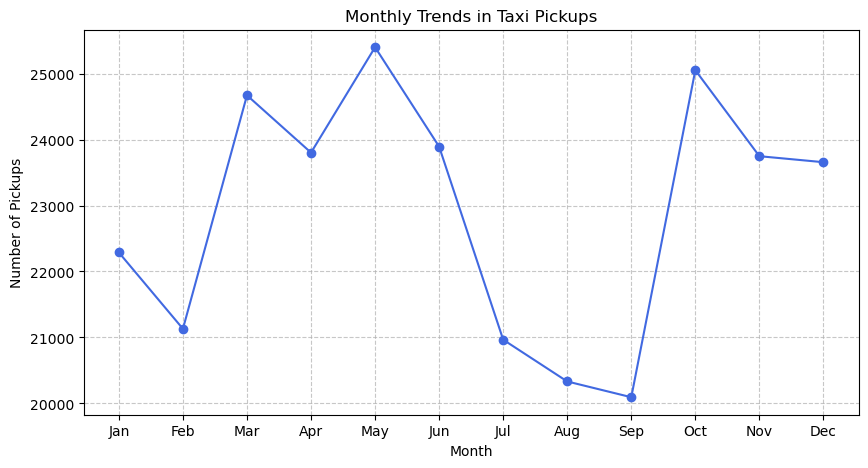

In [33]:
# Show the monthly trends in pickups

monthly_trends = df.groupby('pickup_month').size()
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Bar chart for monthly trends
plt.figure(figsize=(10, 5))
plt.plot(months_labels, monthly_trends.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values? <br>
<b>Shivam:</b> There are zero values in all four mentioned columns. However, zero value in `tip_amount` seems natural as there can be many scenarios where customer paid zero tip as it is optional.

In [34]:
# Analyse the above parameters
zero_values = (df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0).sum()
print("Count of zero values:")
print(zero_values)


Count of zero values:
fare_amount         77
tip_amount       61544
total_amount        30
trip_distance     3388
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these? <br>
<b>Shivam:</b> Yes, it is beneficial to create a copy DataFrame leaving out the zero values from these columns. However, zero value in `tip_amount` seems natural as there can be many scenarios where customer paid zero tip as it is optional. Hence, not leaved rows with zero values of `tip_amount`

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance? <br>
<b>Shivam:</b> No. These cases are valid rides. There can be small rides where user have pick-up and drop-off in same zone.

In [35]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[
    (df['fare_amount'] > 0) & 
    (df['total_amount'] > 0) & 
    ~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))
].copy()

print(f'Shape post removing rows with zero entries: {df_non_zero.shape}')

# Restting the index as few rows were deleted.
df_non_zero.reset_index(drop=True, inplace=True)

print(df_non_zero.info())

(273818, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273818 entries, 0 to 273817
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               273818 non-null  int64         
 1   tpep_pickup_datetime   273818 non-null  datetime64[us]
 2   tpep_dropoff_datetime  273818 non-null  datetime64[us]
 3   passenger_count        273818 non-null  float64       
 4   trip_distance          273818 non-null  float64       
 5   RatecodeID             273818 non-null  float64       
 6   store_and_fwd_flag     273818 non-null  object        
 7   PULocationID           273818 non-null  int64         
 8   DOLocationID           273818 non-null  int64         
 9   payment_type           273818 non-null  int64         
 10  fare_amount            273818 non-null  float64       
 11  extra                  273818 non-null  float64       
 12  mta_tax                273818 n

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [112]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()

# Lineplot for monthly revenue trends
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   quarter  total_amount  Revenue_Proportion
0        1    1875470.49           23.760891
1        2    2116195.64           26.810709
2        3    1790651.90           22.686299
3        4    2110780.28           26.742100


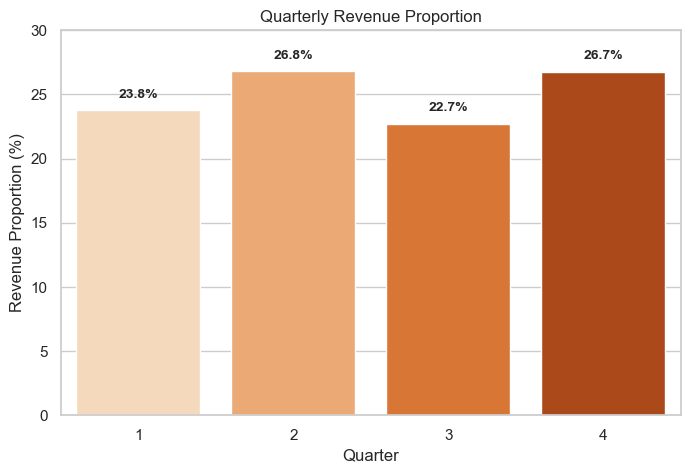

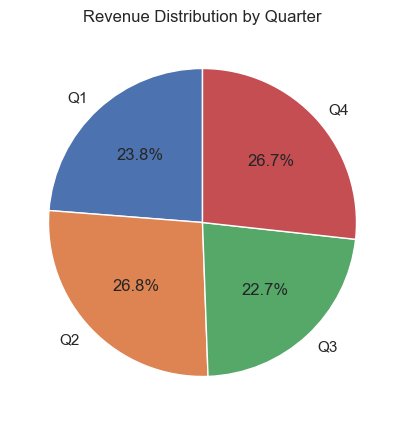

In [106]:
# Calculate proportion of each quarter

df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['Revenue_Proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

print(quarterly_revenue)

# Bar chart for quarterly revenue proportion
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=quarterly_revenue, 
    x='quarter', 
    y='Revenue_Proportion', 
    palette='Oranges'
)

# Displaying values on bars correctly
for bar, value in zip(ax.patches, quarterly_revenue['Revenue_Proportion']):
    x = bar.get_x() + bar.get_width() / 2  # Correct x-position
    y = bar.get_height() + 1  # Slightly above the bar
    ax.text(x, y, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Quarter")
plt.ylabel("Revenue Proportion (%)")
plt.title("Quarterly Revenue Proportion")
plt.ylim(0, 30)

plt.show()

# Pie chart for quarterly revenue proportion
plt.figure(figsize=(8, 5))
plt.pie(
    quarterly_revenue['total_amount'],
    labels=[f"Q{q}" for q in quarterly_revenue['quarter']],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Revenue Distribution by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

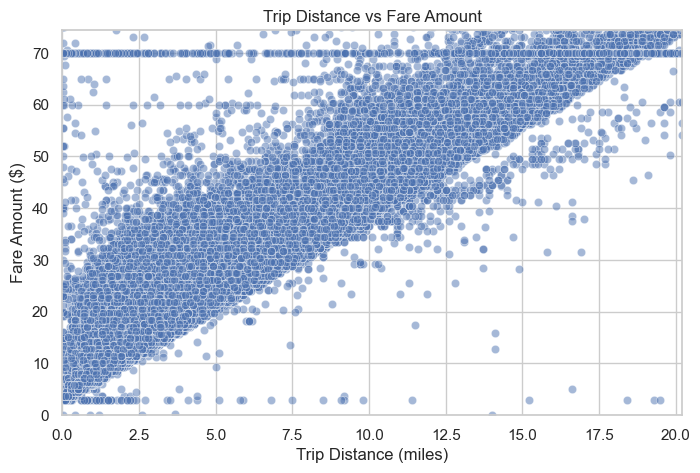

In [113]:
# Show how trip fare is affected by distance
# Filter out trips where trip_distance is 0
df_non_zero_distance = df_non_zero[df_non_zero['trip_distance'] > 0]

# Scatter plot for trip distance vs fare amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_non_zero_distance['trip_distance'], y=df_non_zero_distance['fare_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs Fare Amount")
plt.grid(True)

# Removing extreme outliers for better visualization
plt.ylim(0, df_non_zero_distance['fare_amount'].quantile(0.99))
plt.xlim(0, df_non_zero_distance['trip_distance'].quantile(0.99))

plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

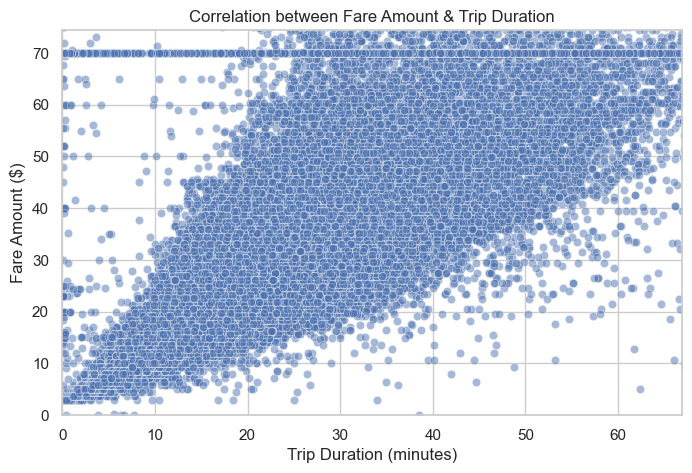

In [109]:
# Show relationship between fare and trip duration

df_non_zero_distance['trip_duration'] = (df_non_zero_distance['tpep_dropoff_datetime'] - df_non_zero_distance['tpep_pickup_datetime']).dt.total_seconds() / 60
df_non_zero_distance = df_non_zero_distance[df_non_zero_distance['trip_duration'] > 0]
correlation_fare_duration = df_non_zero_distance[['fare_amount', 'trip_duration']].corr().iloc[0, 1]

# Plotting scatterplot between fare amount and trip duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_non_zero_distance['trip_duration'], y=df_non_zero_distance['fare_amount'], alpha=0.5)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Correlation between Fare Amount & Trip Duration")

# Removing extreme outliers for better visualization
plt.ylim(0, df_non_zero_distance['fare_amount'].quantile(0.99))
plt.xlim(0, df_non_zero_distance['trip_duration'].quantile(0.99))

plt.show()


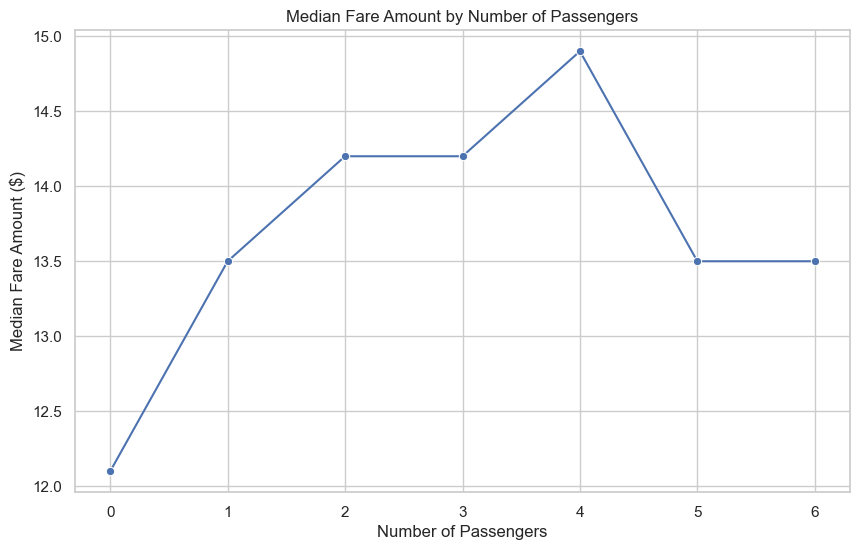

In [114]:
# Show relationship between fare and number of passengers

median_fare = df_non_zero_distance.groupby('passenger_count')['fare_amount'].median().reset_index()

# Lineplot between median fare amount vs number of passangers
plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='fare_amount', data=median_fare, marker='o')
plt.xlabel('Number of Passengers')
plt.ylabel('Median Fare Amount ($)')
plt.title('Median Fare Amount by Number of Passengers')
plt.grid(True)
plt.show()

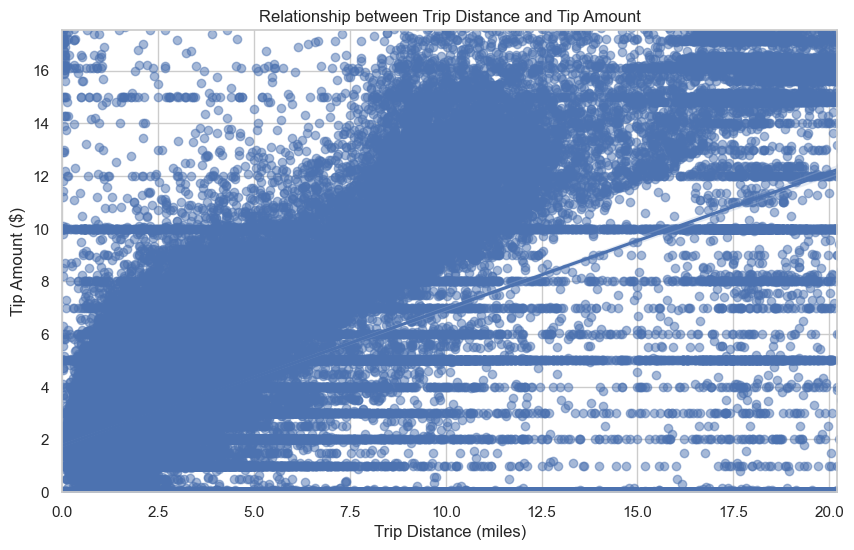

In [115]:
# Show relationship between tip and trip distance

# Regplot between trip distance and tip amount
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='tip_amount', data=df_non_zero_distance, scatter_kws={'alpha':0.5})
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.grid(True)

# Removing extreme outliers for better visualization
plt.ylim(0, df_non_zero_distance['tip_amount'].quantile(0.99))
plt.xlim(0, df_non_zero_distance['trip_distance'].quantile(0.99))

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

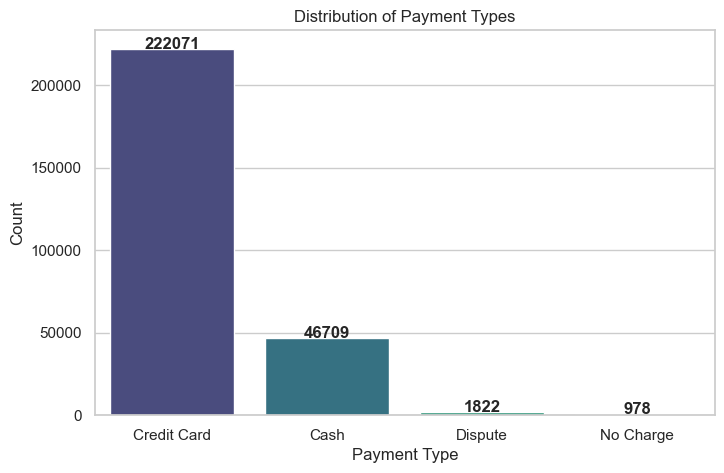

In [90]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

payment_counts = df_non_zero_distance['payment_type'].value_counts()

# Adding labels to x-axis
payment_labels_ordered = [payment_labels[p] for p in payment_counts.index]

# Ploting the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=payment_labels_ordered, y=payment_counts.values, palette='viridis')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=0)
for i, value in enumerate(payment_counts.values):
    ax.text(i, value + 50, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [45]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

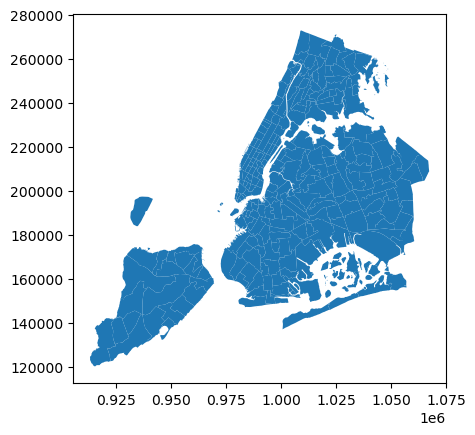

In [46]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [47]:
# Merge zones and trip records using locationID and PULocationID
df_merged = df_non_zero_distance.merge(
    zones, left_on="PULocationID", right_on="LocationID", how="left", suffixes=("", "_pickup")
)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271597 entries, 0 to 271596
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               271597 non-null  int64         
 1   tpep_pickup_datetime   271597 non-null  datetime64[us]
 2   tpep_dropoff_datetime  271597 non-null  datetime64[us]
 3   passenger_count        271597 non-null  float64       
 4   trip_distance          271597 non-null  float64       
 5   RatecodeID             271597 non-null  float64       
 6   store_and_fwd_flag     271597 non-null  object        
 7   PULocationID           271597 non-null  int64         
 8   DOLocationID           271597 non-null  int64         
 9   payment_type           271597 non-null  int64         
 10  fare_amount            271597 non-null  float64       
 11  extra                  271597 non-null  float64       
 12  mta_tax                271597 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [48]:
# Group data by location and calculate the number of trips
trips_per_location = df_merged.groupby("PULocationID").size().reset_index(name="total_trips")
trips_per_location.describe()

PULocationID   total_trips
count    238.000000    238.000000
mean     133.802521   1141.163866
std       77.397481   2647.540694
min        1.000000      1.000000
25%       66.250000      6.000000
50%      135.500000     17.000000
75%      201.750000    166.500000
max      265.000000  14243.000000

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [49]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Filling NaN values with 0 for locations that had no trips
zones_with_trips["total_trips"] = zones_with_trips["total_trips"].fillna(0)

print(zones_with_trips.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_trips  
0           1.0          5.0  
1           NaN          0.0  
2           3.0        

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

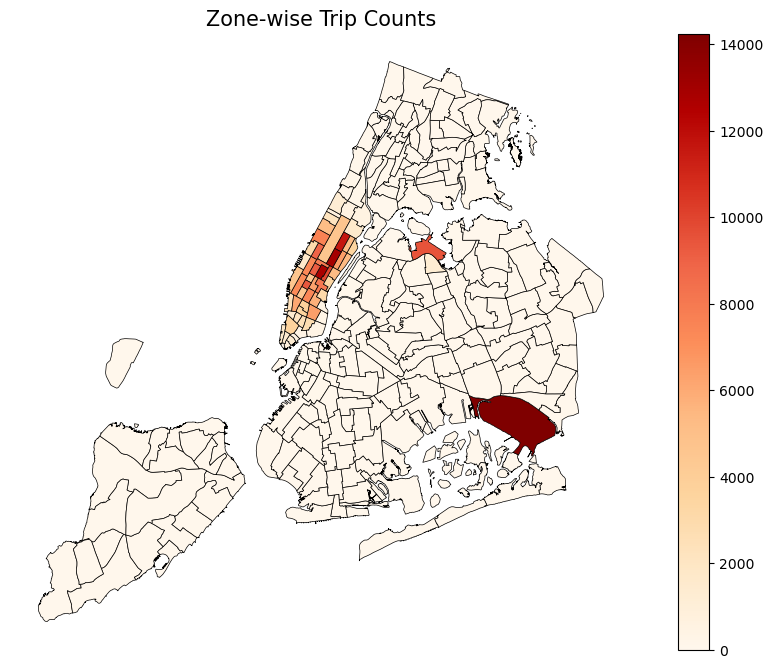

In [50]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the map and display it
zones_with_trips.plot(column="total_trips", cmap="OrRd", linewidth=0.5, edgecolor="black", legend=True, ax=ax)
ax.set_title("Zone-wise Trip Counts", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()


In [51]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones_with_trips.sort_values(by="total_trips", ascending=False)
zones_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  total_trips  
131         132.0      14243.0  
236         237.0      12930.0  
160         161.0      12791.0  
235         236.0      11580.0  
161         162.0       9920.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **Here are my findings from above analysis.** (Added by Shivam) 

- The **busiest time** for taxi trips is between **4 PM and 8 PM**, indicating high demand during evening hours.
- Taxi traffic remains **consistent across all days**, with **Thursdays and Sundays being slightly busier** than other days.
- **Traffic drops** between **July and September**, possibly due to summer vacations.  
- **May and October see the highest number of trips**, likely due to favorable weather and tourism.
- Revenue follows the same pattern as traffic. **Lower revenue in July-September**, with **peaks in May and October**.  
- **Quarterly revenue is fairly balanced**, with **Q2 (April-June) and Q4 (October-December) showing slight gains**.
- **Fares increase proportionally** with both **trip distance and duration**.  
- There is a **flat fare of $70** for certain rides, regardless of distance or duration.
- **Fares increase with passenger count up to 4 passengers**, but **decrease for larger groups** possibly due to fare-sharing or group discounts.
- **Longer trips generally receive higher tips**, but there are also **cases of fixed tip amounts regardless of distance**.
- The **busiest areas** for taxi trips include zones **131, 160-161, and 235-236**.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

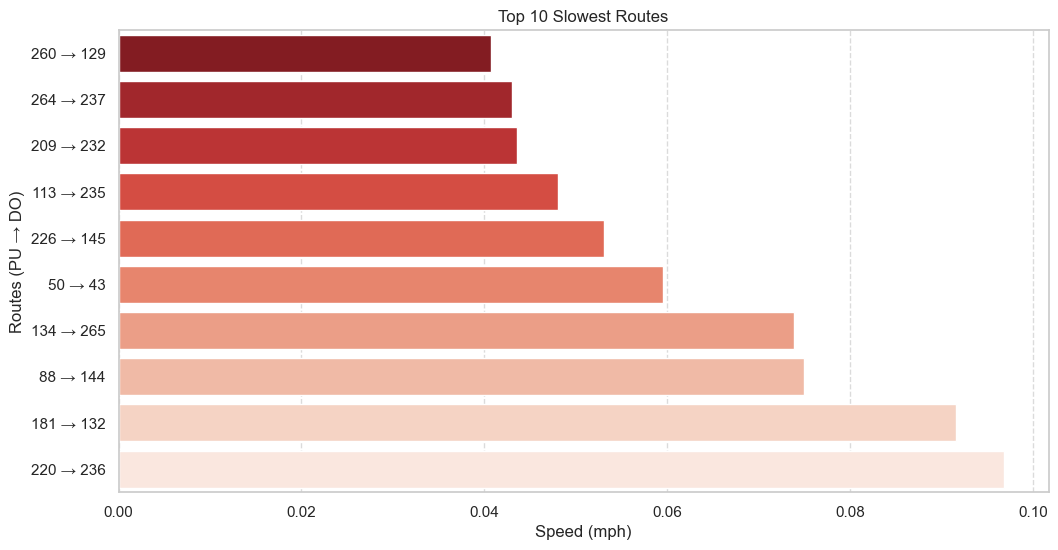

In [119]:
# Find routes which have the slowest speeds at different times of the day
df_non_zero_distance["trip_duration"] = (df_non_zero_distance["tpep_dropoff_datetime"] - df_non_zero_distance["tpep_pickup_datetime"]).dt.total_seconds()/ 60
df_filtered = df_non_zero_distance[df_non_zero_distance["trip_duration"] > 0]

route_stats = df_filtered.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_trip_duration=("trip_duration", "mean"), 
    total_distance=("trip_distance", "sum")
).reset_index()

# Calculating speed in miles per hour
route_stats["speed_mph"] = (route_stats["total_distance"] / route_stats["avg_trip_duration"]) * 60
slow_routes = route_stats.sort_values(by="speed_mph", ascending=True)
slowest_10 = slow_routes.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=slowest_10, x="speed_mph", y=slowest_10["PULocationID"].astype(str) + " → " + slowest_10["DOLocationID"].astype(str), palette="Reds_r")

plt.xlabel("Speed (mph)")
plt.ylabel("Routes (PU → DO)")
plt.title("Top 10 Slowest Routes")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


How does identifying high-traffic, high-demand routes help us? <br>
<b>Shivam:</b> This will help us to identify the routes with most congestion.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

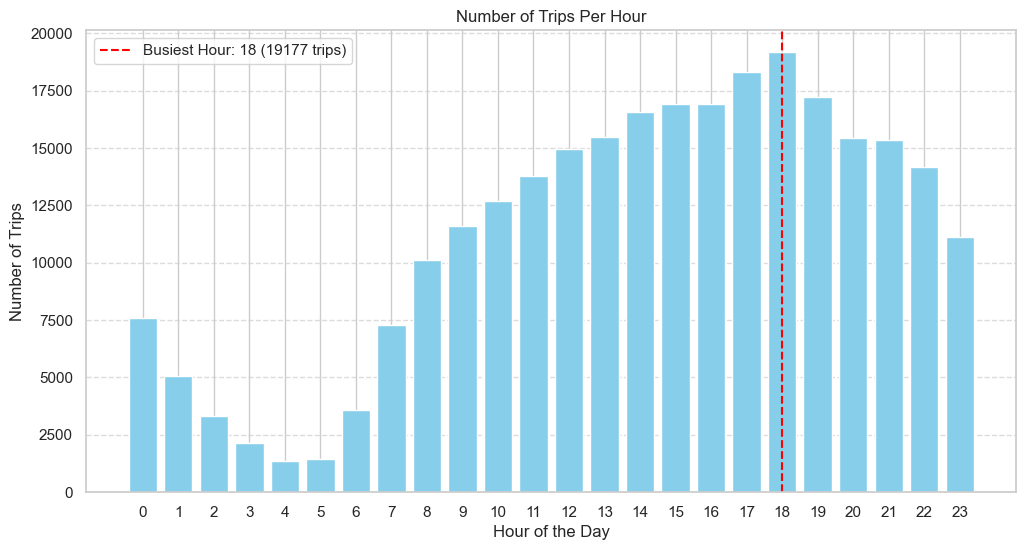

In [87]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df_non_zero_distance.groupby("pickup_hour").size().reset_index(name="total_trips")

busiest_hour = trips_per_hour.loc[trips_per_hour["total_trips"].idxmax()]

plt.figure(figsize=(12, 6))
plt.bar(trips_per_hour["pickup_hour"], trips_per_hour["total_trips"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Hour")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight the busiest hour
plt.axvline(busiest_hour["pickup_hour"], color="red", linestyle="--", label=f'Busiest Hour: {busiest_hour["pickup_hour"]} ({busiest_hour["total_trips"]} trips)')
plt.legend()

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips
trips_per_hour = df_non_zero_distance.groupby("pickup_hour").size().reset_index(name="sampled_trips")
busiest_hours = trips_per_hour.sort_values(by="sampled_trips", ascending=False)

sample_fraction = 0.75
busiest_hours["actual_trips"] = (busiest_hours["sampled_trips"] * 100) / sample_fraction

busiest_hours.head()


pickup_hour  sampled_trips  actual_trips
18           18          19177  2.556933e+06
17           17          18321  2.442800e+06
19           19          17230  2.297333e+06
15           15          16930  2.257333e+06
16           16          16914  2.255200e+06

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

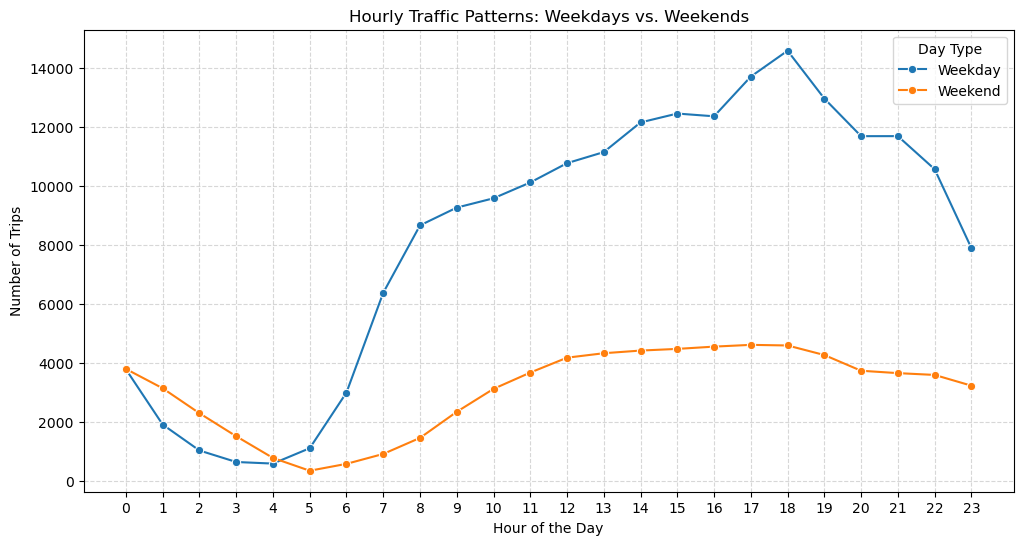

In [59]:
# Compare traffic trends for the week days and weekends
weekday_mapping = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4,
    "Saturday": 5, "Sunday": 6
}

# Pickup_day to numerical values
df_non_zero_distance["weekday_num"] = df_non_zero_distance["pickup_day"].map(weekday_mapping)

# Weekday (0-4) or Weekend (5-6)
df_non_zero_distance["day_type"] = df_non_zero_distance["weekday_num"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

trips_by_hour = df_non_zero_distance.groupby(["pickup_hour", "day_type"]).size().reset_index(name="trip_count")
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_by_hour, x="pickup_hour", y="trip_count", hue="day_type", marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xticks(range(24))
plt.legend(title="Day Type")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us? <br>
<b>Shivam:</b> Weekend patterns are nearly flat for the day and evening. However, weekdays see huge surge in traffic during day and evening times. This might be due to office hours on weekdays, people tends to take taxis more often.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

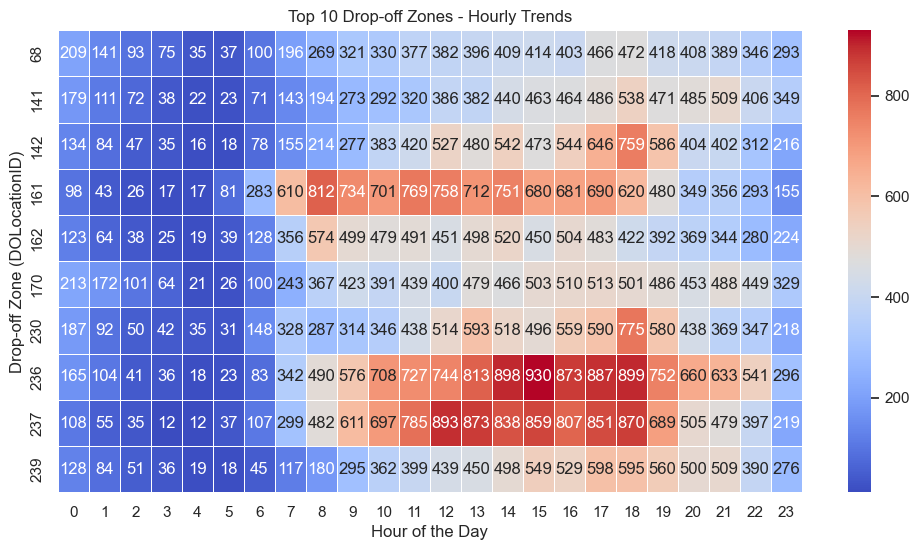

<Figure size 1200x600 with 0 Axes>

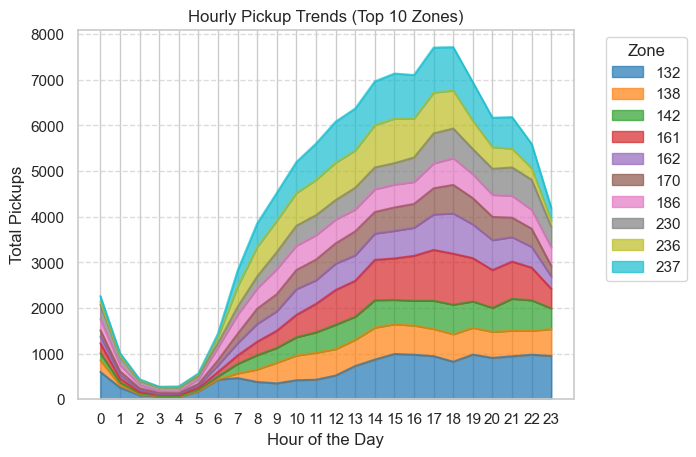

In [123]:
# Find top 10 pickup and dropoff zones
pickup_counts = df_non_zero_distance.groupby(["PULocationID", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_pickup_zones = pickup_counts.groupby("PULocationID")["trip_count"].sum().nlargest(10).index
top_pickup_data = pickup_counts[pickup_counts["PULocationID"].isin(top_10_pickup_zones)]
dropoff_counts = df_non_zero_distance.groupby(["DOLocationID", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_dropoff_zones = dropoff_counts.groupby("DOLocationID")["trip_count"].sum().nlargest(10).index
top_dropoff_data = dropoff_counts[dropoff_counts["DOLocationID"].isin(top_10_dropoff_zones)]

# Heatmap for pick-ups
pickup_heatmap_data = top_pickup_data.pivot(index="PULocationID", columns="pickup_hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(pickup_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Zone (PULocationID)")
plt.title("Top 10 Pickup Zones - Hourly Trends")
plt.show()

# Heatmap for drop-offs
dropoff_heatmap_data = top_dropoff_data.pivot(index="DOLocationID", columns="pickup_hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(dropoff_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Drop-off Zone (DOLocationID)")
plt.title("Top 10 Drop-off Zones - Hourly Trends")
plt.show()

# Stacked area chart
plt.figure(figsize=(12, 6))
top_pickup_pivot = top_pickup_data.pivot(index="pickup_hour", columns="PULocationID", values="trip_count")
top_pickup_pivot.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

plt.xlabel("Hour of the Day")
plt.ylabel("Total Pickups")
plt.title("Hourly Pickup Trends (Top 10 Zones)")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Zones with Highest Pickup/Drop-off Ratio:
     pickup_count  dropoff_count  pickup_drop_ratio
70         1239.0            137           9.043796
132       14244.0           2845           5.006678
138        9488.0           3238           2.930204
186        9327.0           6123           1.523273
43         4656.0           3370           1.381602
249        6101.0           4443           1.373171
114        3563.0           2629           1.355268
162        9921.0           7772           1.276505
161       12791.0          10716           1.193636
100        4436.0           3752           1.182303

Bottom 10 Zones with Lowest Pickup/Drop-off Ratio:
     pickup_count  dropoff_count  pickup_drop_ratio
8             0.0              4                0.0
27            0.0              5                0.0
30            0.0              3                0.0
58            0.0             10                0.0
59            0.0              1                0.0
96            0

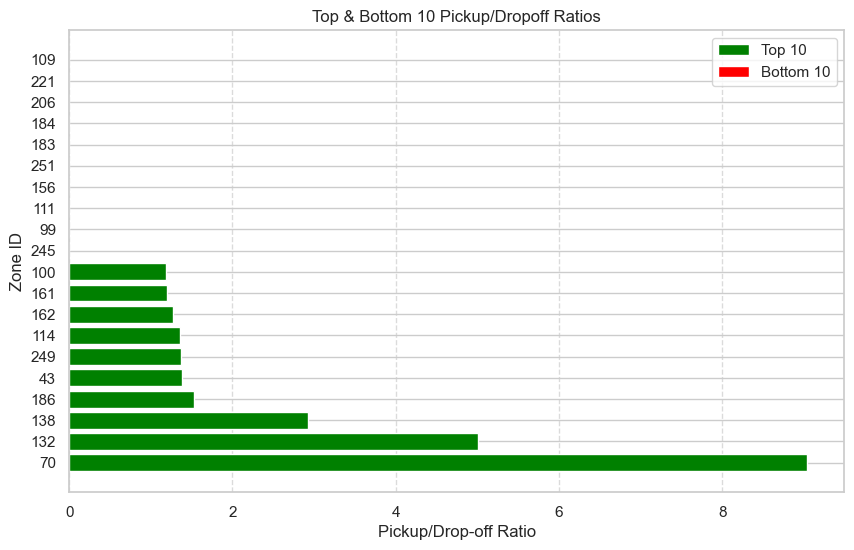

In [129]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_non_zero_distance["PULocationID"].value_counts().rename("pickup_count")
dropoff_counts = df_non_zero_distance["DOLocationID"].value_counts().rename("dropoff_count")

# Merging pickup and dropoff into a single DataFrame
zone_ratios = pd.DataFrame({"pickup_count": pickup_counts, "dropoff_count": dropoff_counts}).fillna(0)
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / (zone_ratios["dropoff_count"])

top_10_zones = zone_ratios.nlargest(10, "pickup_drop_ratio")
bottom_10_zones = zone_ratios.nsmallest(10, "pickup_drop_ratio")


print("Top 10 Zones with Highest Pickup/Drop-off Ratio:")
print(top_10_zones)

print("\nBottom 10 Zones with Lowest Pickup/Drop-off Ratio:")
p#rint(bottom_10_zones)

# Plotting top 10 and bottom 10 pickup/dropoff ratios
plt.figure(figsize=(10, 6))
zone_ratios_sorted = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False)

plt.barh(zone_ratios_sorted.index.astype(str)[:10], zone_ratios_sorted["pickup_drop_ratio"][:10], color="green", label="Top 10")
plt.barh(zone_ratios_sorted.index.astype(str)[-10:], zone_ratios_sorted["pickup_drop_ratio"][-10:], color="red", label="Bottom 10")

plt.xlabel("Pickup/Drop-off Ratio")
plt.ylabel("Zone ID")
plt.title("Top & Bottom 10 Pickup/Dropoff Ratios")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

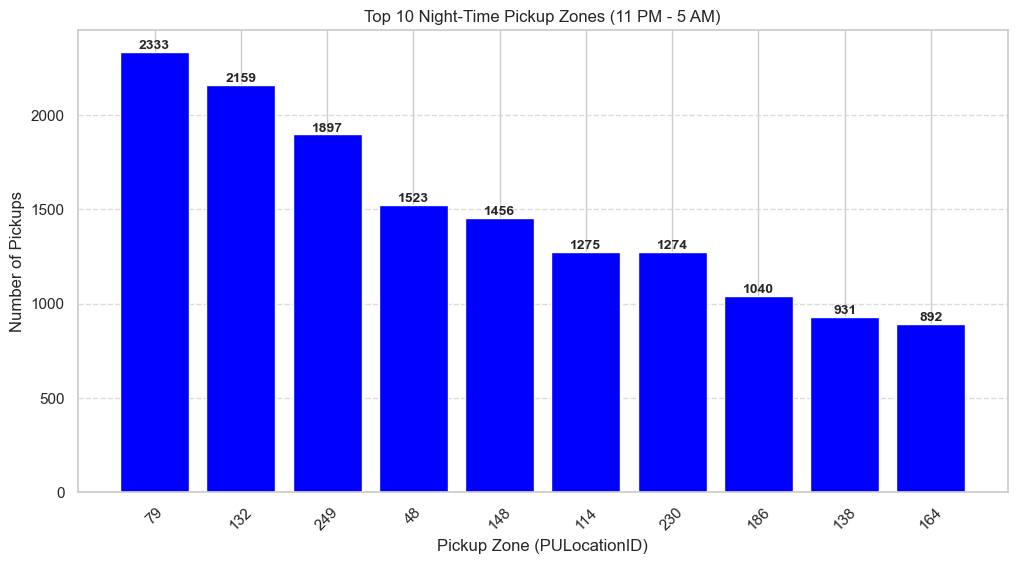

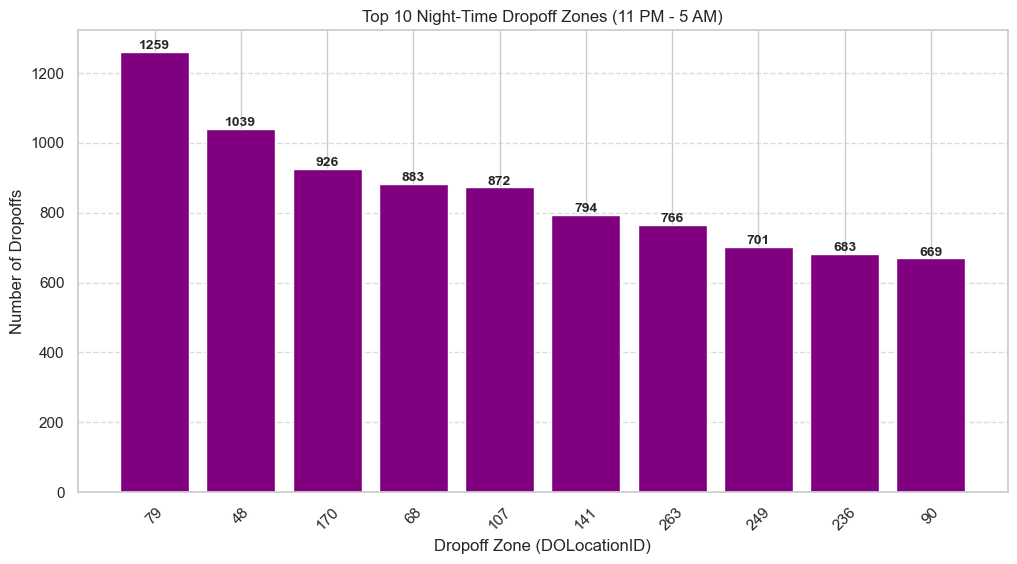

In [135]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
df_night = df_non_zero_distance[df_non_zero_distance["pickup_hour"].isin(night_hours)]

night_pickup_counts = df_night["PULocationID"].value_counts().rename("pickup_count")
night_dropoff_counts = df_night["DOLocationID"].value_counts().rename("dropoff_count")

top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

# Top 10 Night Pickup Zones
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_night_pickups.index.astype(str), top_10_night_pickups.values, color="blue")
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Night-Time Pickup Zones (11 PM - 5 AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# Top 10 Night Dropoff Zones
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_night_dropoffs.index.astype(str), top_10_night_dropoffs.values, color="purple")
plt.xlabel("Dropoff Zone (DOLocationID)")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Night-Time Dropoff Zones (11 PM - 5 AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

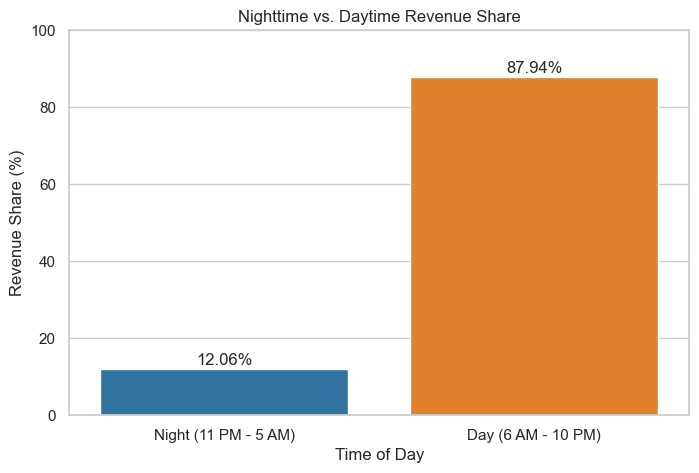

In [64]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(set(range(24)) - set(night_hours))

night_revenue = df_non_zero_distance[df_non_zero_distance["pickup_hour"].isin(night_hours)]["total_amount"].sum()
day_revenue = df_non_zero_distance[df_non_zero_distance["pickup_hour"].isin(day_hours)]["total_amount"].sum()

total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Creating a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=["Night (11 PM - 5 AM)", "Day (6 AM - 10 PM)"], y=[night_share, day_share], palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Time of Day")
plt.ylabel("Revenue Share (%)")
plt.title("Nighttime vs. Daytime Revenue Share")
plt.ylim(0, 100)
plt.text(0, night_share + 1, f"{night_share:.2f}%", ha="center", fontsize=12)
plt.text(1, day_share + 1, f"{day_share:.2f}%", ha="center", fontsize=12)

plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

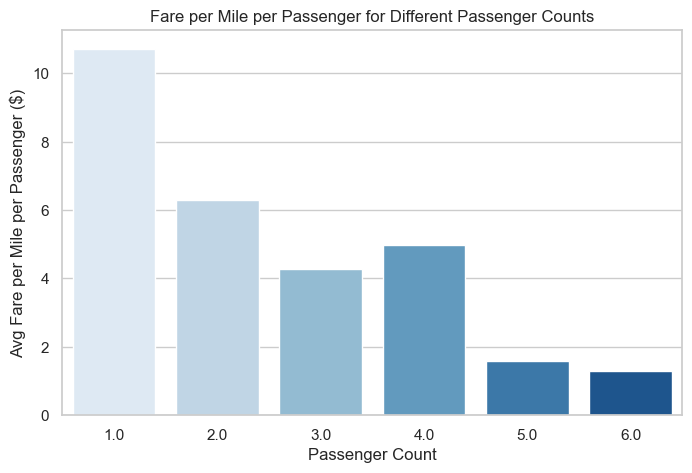

In [136]:
# Analyse the fare per mile per passenger for different passenger counts

df_non_zero_distance["fare_per_mile_per_passenger"] = (
    df_non_zero_distance["fare_amount"] / (df_non_zero_distance["trip_distance"] * df_non_zero_distance["passenger_count"])
)

fare_analysis = df_non_zero_distance.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()
fare_analysis = fare_analysis[fare_analysis["passenger_count"] > 0]

# Creating a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="fare_per_mile_per_passenger", data=fare_analysis, palette="Blues")
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare per Mile per Passenger ($)")
plt.title("Fare per Mile per Passenger for Different Passenger Counts")

plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

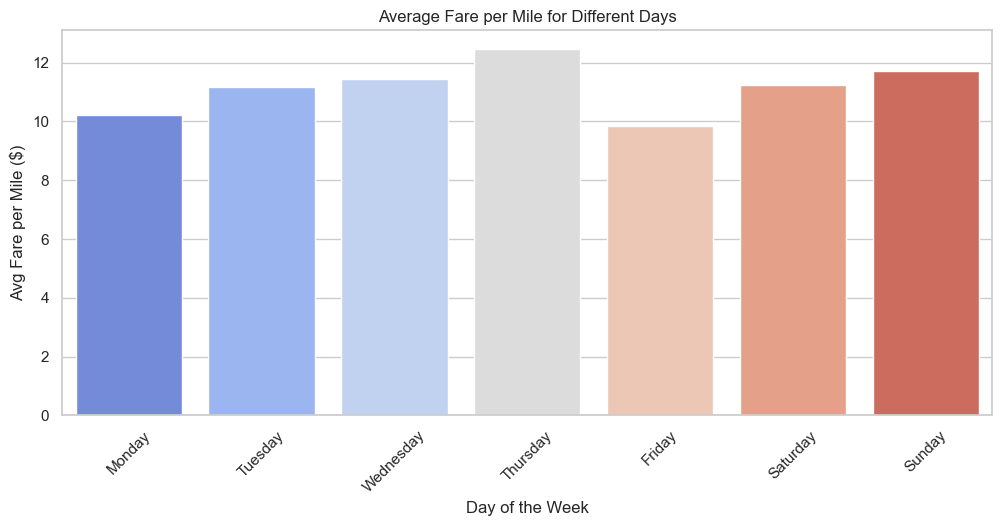

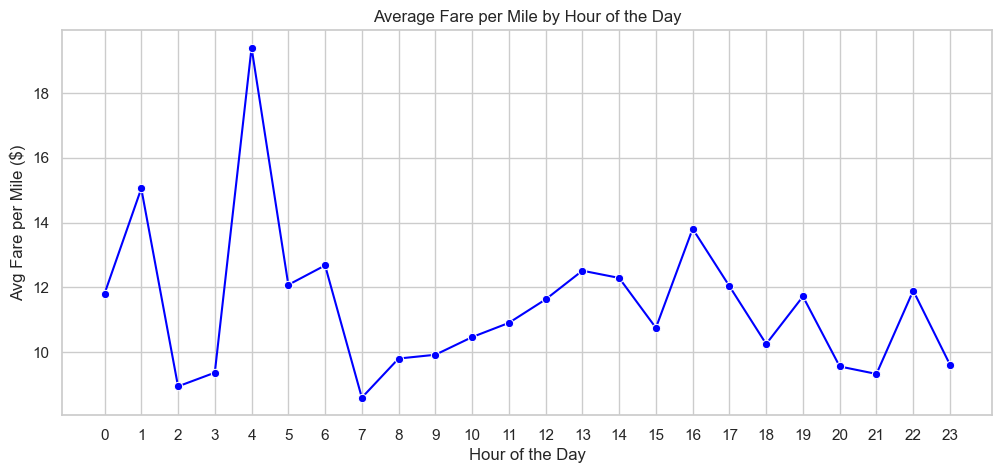

In [66]:
# Compare the average fare per mile for different days and for different times of the day

df_non_zero_distance["fare_per_mile"] = df_non_zero_distance["fare_amount"] / df_non_zero_distance["trip_distance"]
# Excluding zero distance trips
df_non_zero_distance = df_non_zero_distance[df_non_zero_distance["trip_distance"] > 0]

fare_by_day = df_non_zero_distance.groupby("pickup_day")["fare_per_mile"].mean().reset_index()
fare_by_hour = df_non_zero_distance.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()

# Plotting fare by day
plt.figure(figsize=(12, 5))
sns.barplot(x="pickup_day", y="fare_per_mile", data=fare_by_day, palette="coolwarm", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.xlabel("Day of the Week")
plt.ylabel("Avg Fare per Mile ($)")
plt.title("Average Fare per Mile for Different Days")
plt.xticks(rotation=45)
plt.show()

# Plotting fare by hour
plt.figure(figsize=(12, 5))
sns.lineplot(x="pickup_hour", y="fare_per_mile", data=fare_by_hour, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

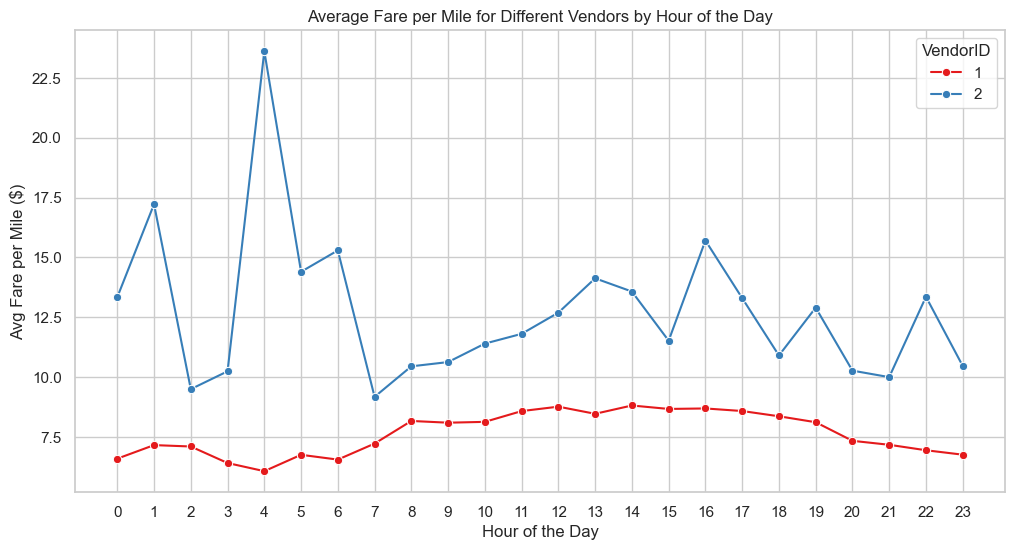

In [67]:
# Compare fare per mile for different vendors

fare_by_vendor_hour = df_non_zero_distance.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour, marker="o", palette="Set1")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile ($)")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(True)

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [68]:
# Defining distance tiers

# Defining distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

df_non_zero_distance["distance_tier"] = df_non_zero_distance["trip_distance"].apply(categorize_distance)
fare_by_vendor_tier = df_non_zero_distance.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set2")
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile ($)")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

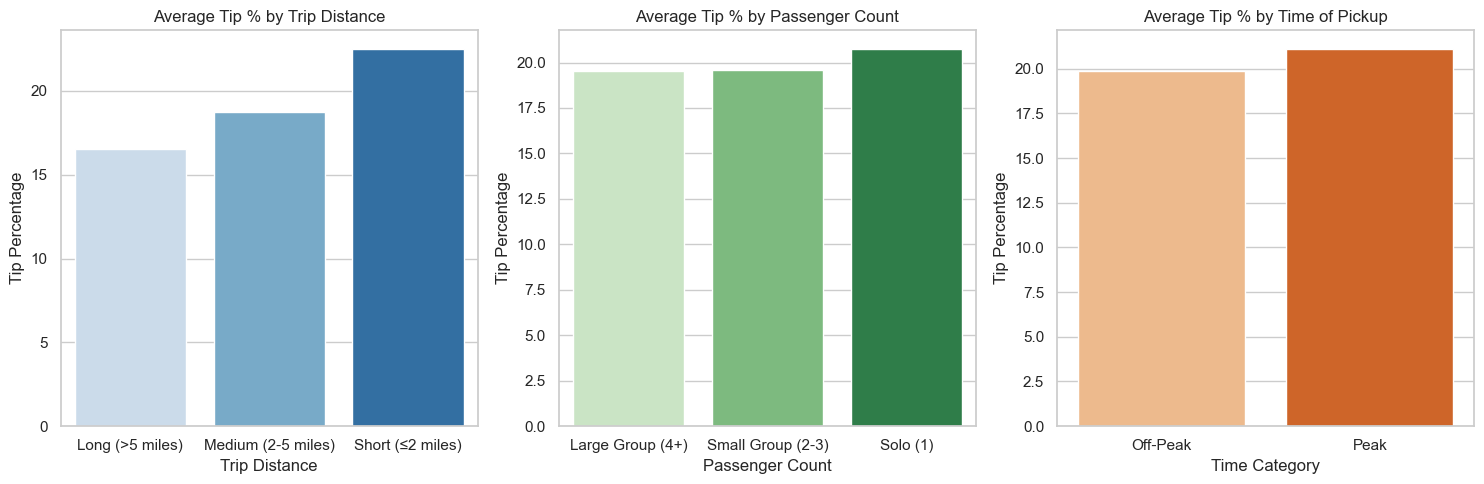

In [72]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Compute tip percentage
df_non_zero_distance["tip_percentage"] = (df_non_zero_distance["tip_amount"] / df_non_zero_distance["fare_amount"]) * 100
# Exclude zero-fare trips
df_non_zero_distance = df_non_zero_distance[df_non_zero_distance["fare_amount"] > 0] 

# Categorize passenger count
def categorize_passengers(count):
    if count == 1:
        return "Solo (1)"
    elif 2 <= count <= 3:
        return "Small Group (2-3)"
    else:
        return "Large Group (4+)"

df_non_zero_distance["passenger_tier"] = df_non_zero_distance["passenger_count"].apply(categorize_passengers)

# Categorize pickup hours
df_non_zero_distance["pickup_hour"] = df_non_zero_distance["pickup_hour"].astype(int)
df_non_zero_distance["time_category"] = df_non_zero_distance["pickup_hour"].apply(
    lambda x: "Peak" if (7 <= x <= 10 or 17 <= x <= 21) else "Off-Peak"
)

# Grouping each tier by tip_percentage
tip_by_distance = df_non_zero_distance.groupby("distance_tier")["tip_percentage"].mean().reset_index()
tip_by_passengers = df_non_zero_distance.groupby("passenger_tier")["tip_percentage"].mean().reset_index()
tip_by_time = df_non_zero_distance.groupby("time_category")["tip_percentage"].mean().reset_index()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x="distance_tier", y="tip_percentage", data=tip_by_distance, ax=axes[0], palette="Blues")
axes[0].set_title("Average Tip % by Trip Distance")
axes[0].set_ylabel("Tip Percentage")
axes[0].set_xlabel("Trip Distance")

sns.barplot(x="passenger_tier", y="tip_percentage", data=tip_by_passengers, ax=axes[1], palette="Greens")
axes[1].set_title("Average Tip % by Passenger Count")
axes[1].set_ylabel("Tip Percentage")
axes[1].set_xlabel("Passenger Count")

sns.barplot(x="time_category", y="tip_percentage", data=tip_by_time, ax=axes[2], palette="Oranges")
axes[2].set_title("Average Tip % by Time of Pickup")
axes[2].set_ylabel("Tip Percentage")
axes[2].set_xlabel("Time Category")

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

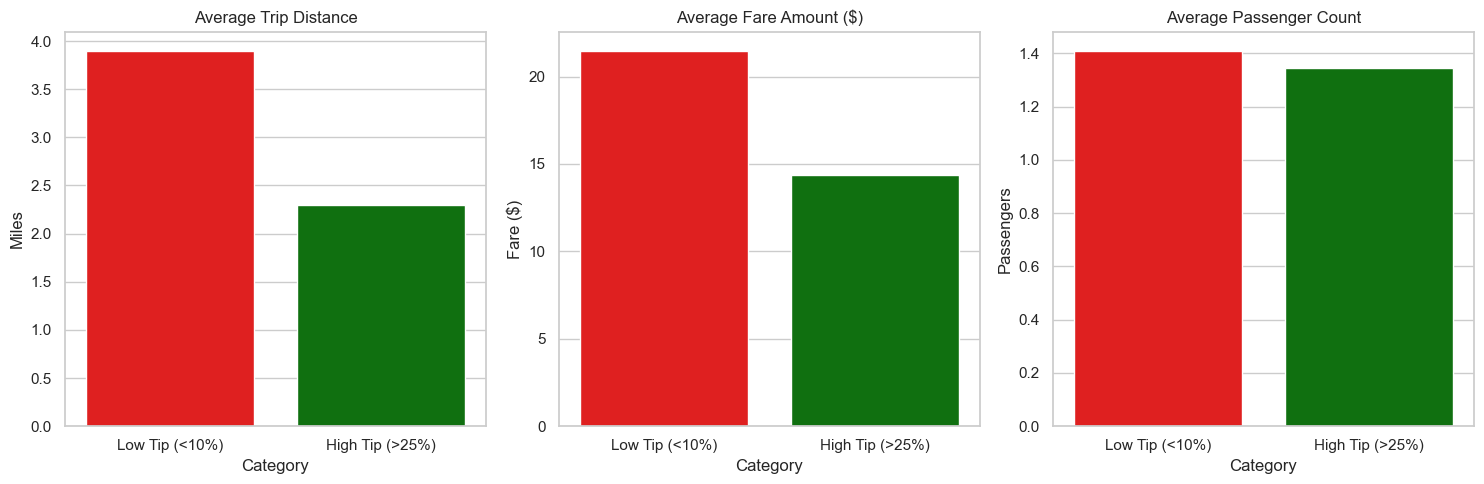

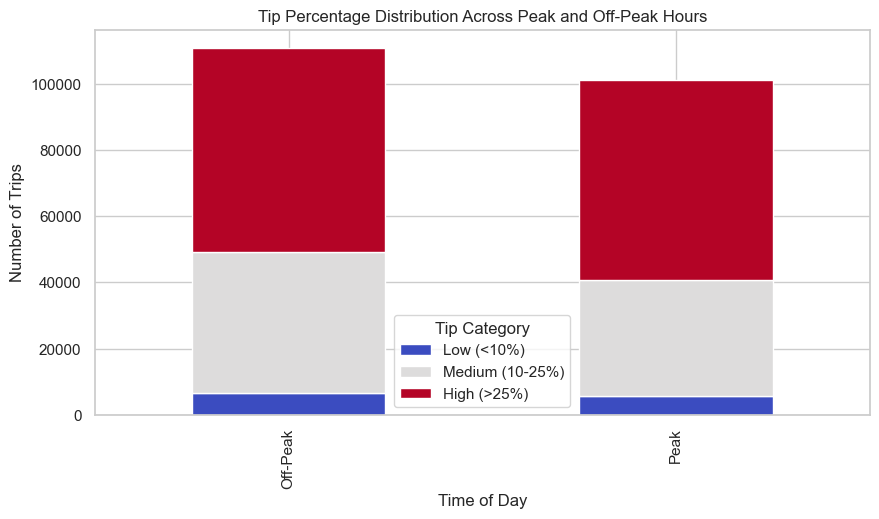

In [73]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df_non_zero_distance[df_non_zero_distance["tip_percentage"] < 10]
high_tip_trips = df_non_zero_distance[df_non_zero_distance["tip_percentage"] > 25]

comparison_df = pd.DataFrame({
    "Category": ["Low Tip (<10%)", "High Tip (>25%)"],
    "Avg Trip Distance": [low_tip_trips["trip_distance"].mean(), high_tip_trips["trip_distance"].mean()],
    "Avg Fare Amount": [low_tip_trips["fare_amount"].mean(), high_tip_trips["fare_amount"].mean()],
    "Avg Passenger Count": [low_tip_trips["passenger_count"].mean(), high_tip_trips["passenger_count"].mean()]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distance
sns.barplot(x="Category", y="Avg Trip Distance", data=comparison_df, ax=axes[0], palette=["red", "green"])
axes[0].set_title("Average Trip Distance")
axes[0].set_ylabel("Miles")

# Fare
sns.barplot(x="Category", y="Avg Fare Amount", data=comparison_df, ax=axes[1], palette=["red", "green"])
axes[1].set_title("Average Fare Amount ($)")
axes[1].set_ylabel("Fare ($)")

# Passenger Count
sns.barplot(x="Category", y="Avg Passenger Count", data=comparison_df, ax=axes[2], palette=["red", "green"])
axes[2].set_title("Average Passenger Count")
axes[2].set_ylabel("Passengers")

plt.tight_layout()
plt.show()

# peak vs. off-peak
df_non_zero_distance["time_category"] = df_non_zero_distance["pickup_hour"].apply(
    lambda x: "Peak" if (7 <= x <= 10 or 17 <= x <= 21) else "Off-Peak"
)

tip_time_comparison = df_non_zero_distance.groupby(["time_category", pd.cut(df_non_zero_distance["tip_percentage"], bins=[0, 10, 25, 100], labels=["Low (<10%)", "Medium (10-25%)", "High (>25%)"])]).size().unstack().fillna(0)
tip_time_comparison.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")
plt.title("Tip Percentage Distribution Across Peak and Off-Peak Hours")
plt.xlabel("Time of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Tip Category")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

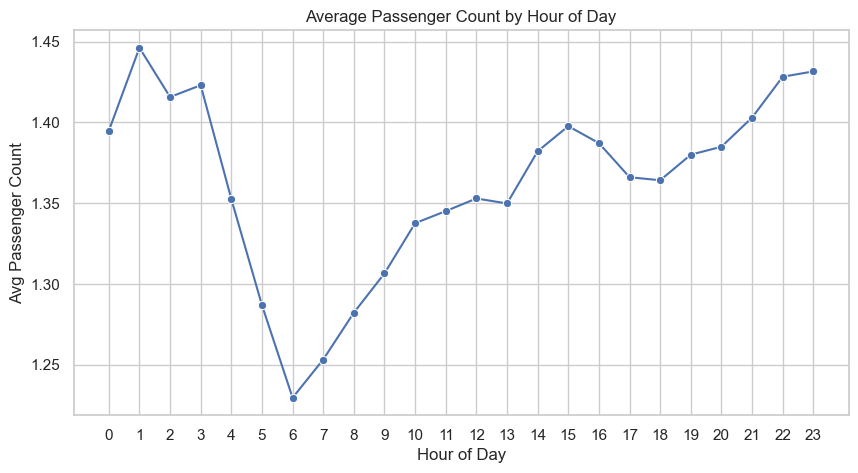

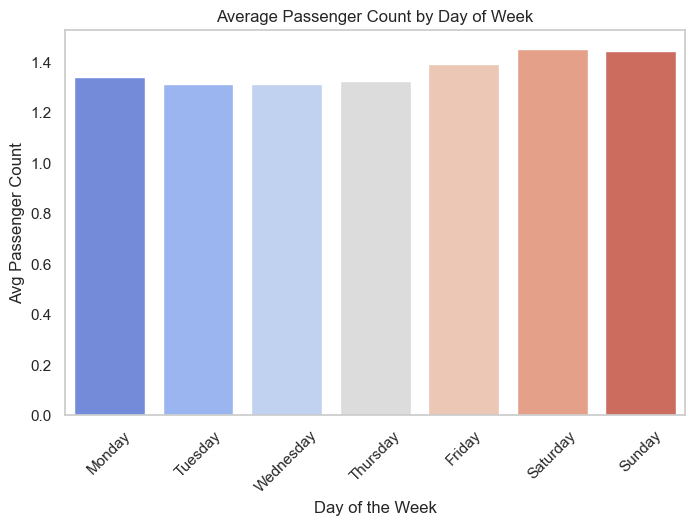

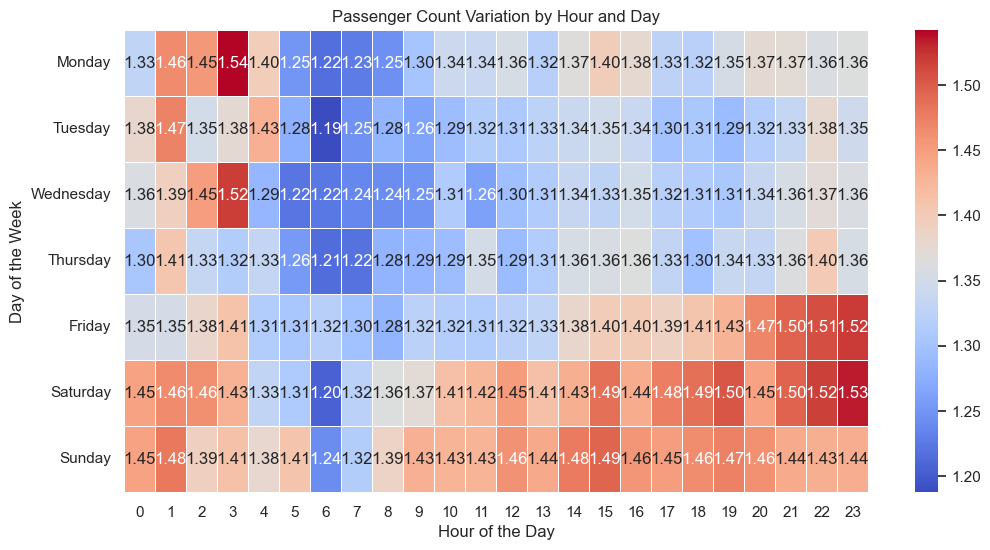

In [74]:
# See how passenger count varies across hours and days

hourly_passenger_count = df_non_zero_distance.groupby("pickup_hour")["passenger_count"].mean()
daily_passenger_count = df_non_zero_distance.groupby("pickup_day")["passenger_count"].mean()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_passenger_count = daily_passenger_count.reindex(days_order)

# Hourly Trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker="o", color="b")
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Passenger Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Daily Trends
plt.figure(figsize=(8, 5))
sns.barplot(x=daily_passenger_count.index, y=daily_passenger_count.values, palette="coolwarm")
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Heatmap of Hour vs Day
heatmap_data = df_non_zero_distance.pivot_table(index="pickup_day", columns="pickup_hour", values="passenger_count", aggfunc="mean").reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Passenger Count Variation by Hour and Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

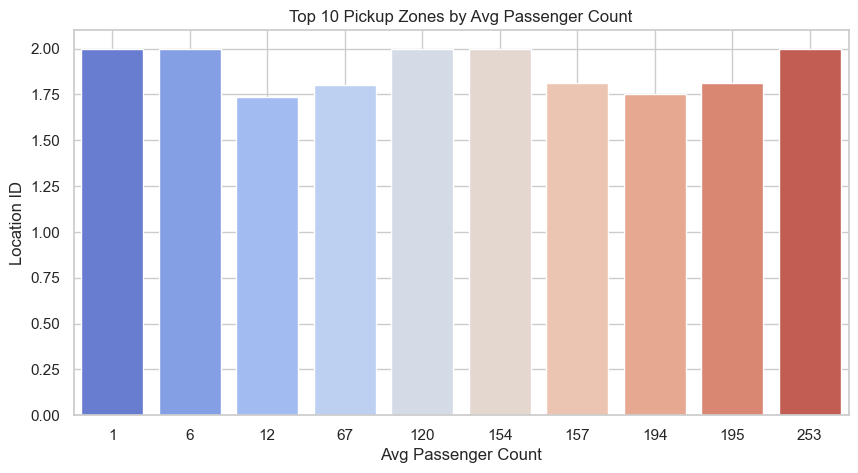

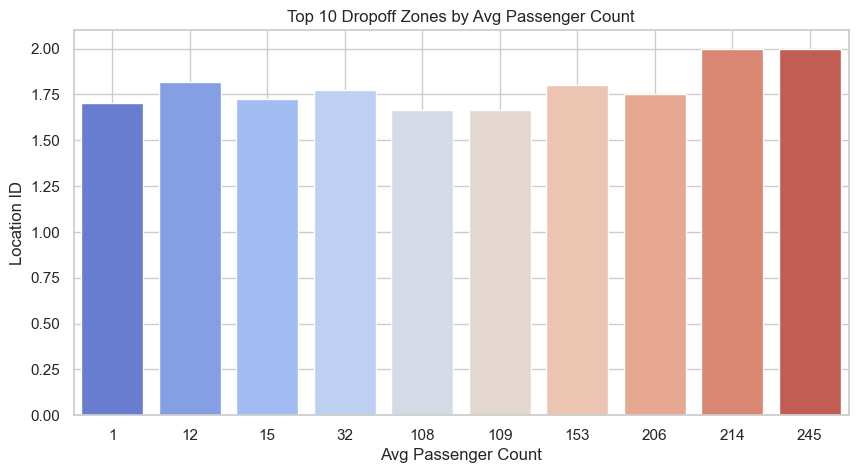

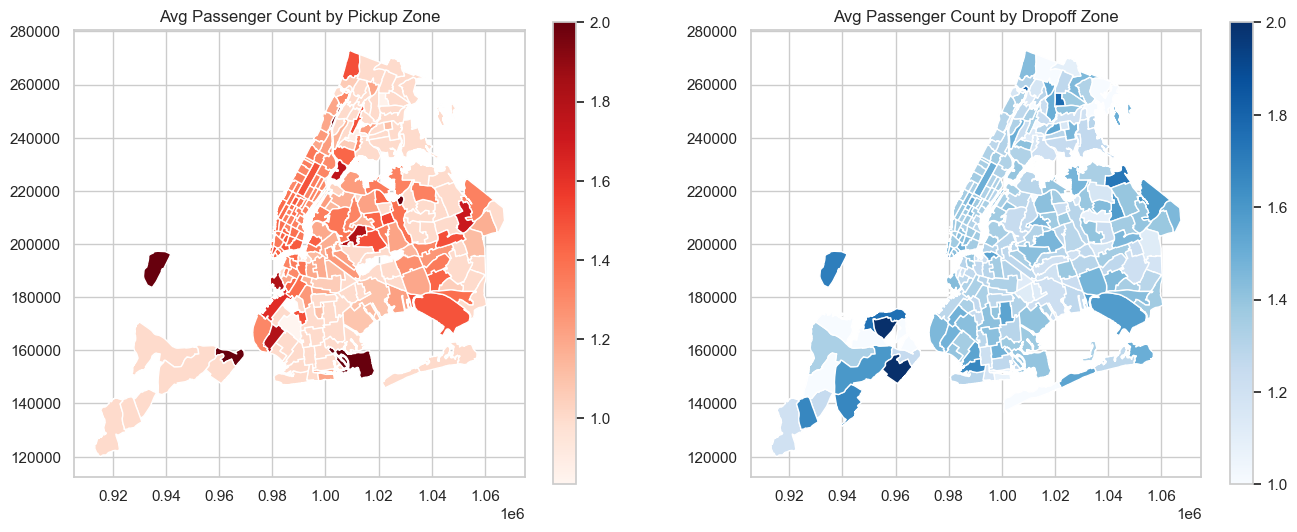

In [140]:
# How does passenger count vary across zones

pickup_passenger_count = df_non_zero_distance.groupby("PULocationID")["passenger_count"].mean().reset_index()
dropoff_passenger_count = df_non_zero_distance.groupby("DOLocationID")["passenger_count"].mean().reset_index()

# Renaming location id column names for better clarity in further steps
pickup_passenger_count.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count_pickup"}, inplace=True)
dropoff_passenger_count.rename(columns={"DOLocationID": "LocationID", "passenger_count": "avg_passenger_count_dropoff"}, inplace=True)

# Merging with Zones Data
zones_pickup = zones.merge(pickup_passenger_count, on="LocationID", how="left")
zones_dropoff = zones.merge(dropoff_passenger_count, on="LocationID", how="left")

# Bar charts of Top Zones
top_pickup_zones = pickup_passenger_count.nlargest(10, "avg_passenger_count_pickup")
top_dropoff_zones = dropoff_passenger_count.nlargest(10, "avg_passenger_count_dropoff")

plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickup_zones["LocationID"], y=top_pickup_zones["avg_passenger_count_pickup"], palette="coolwarm", errorbar=None)
plt.title("Top 10 Pickup Zones by Avg Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.ylabel("Location ID")
plt.grid(axis="x")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_dropoff_zones["LocationID"], y=top_dropoff_zones["avg_passenger_count_dropoff"], palette="coolwarm", errorbar=None)
plt.title("Top 10 Dropoff Zones by Avg Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.ylabel("Location ID")
plt.grid(axis="x")
plt.show()

# Spatial Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

zones_pickup.plot(column="avg_passenger_count_pickup", cmap="Reds", legend=True, ax=ax[0])
ax[0].set_title("Avg Passenger Count by Pickup Zone")

zones_dropoff.plot(column="avg_passenger_count_dropoff", cmap="Blues", legend=True, ax=ax[1])
ax[1].set_title("Avg Passenger Count by Dropoff Zone")

plt.show()



In [77]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_per_zone = df_non_zero_distance.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_per_zone.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count"}, inplace=True)
zones_with_trips = zones.merge(avg_passenger_per_zone, on="LocationID", how="left")

# Filling NaN values with 0 for zones with no trips
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   avg_passenger_count  
0             2.000000  
1             0.000000  
2             1.000000  
3             1.358491  
4             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

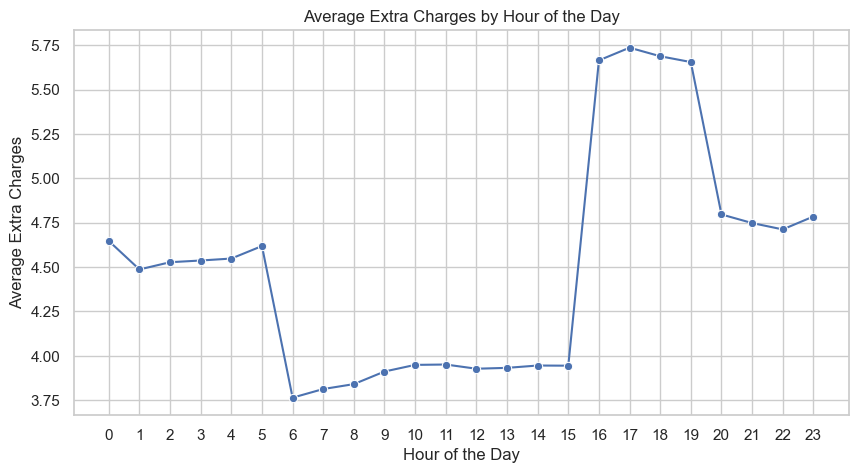

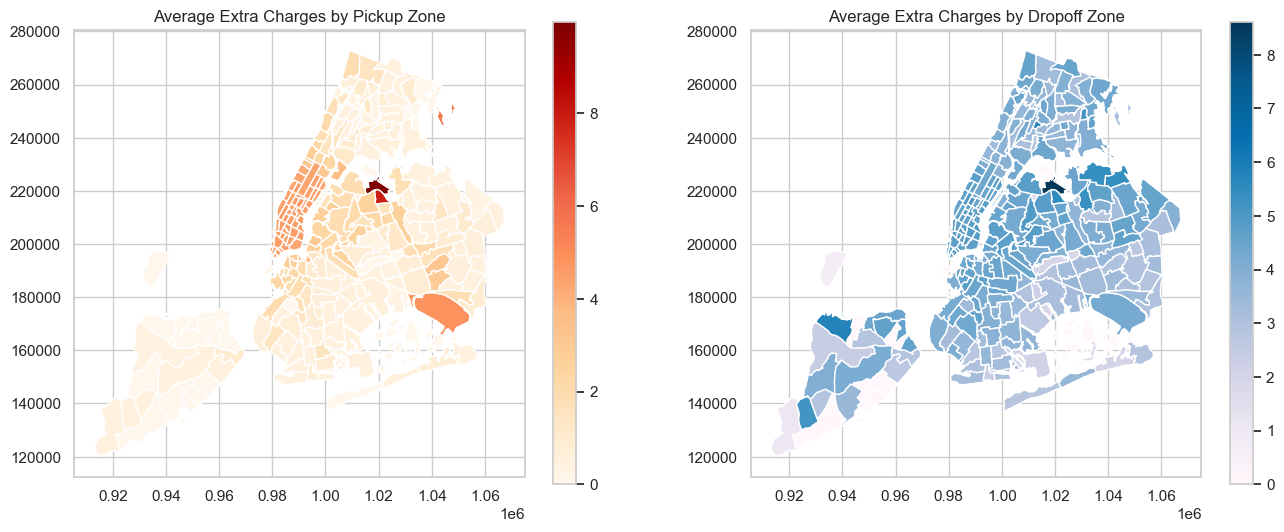

In [139]:
# How often is each surcharge applied?

df_non_zero_distance["total_extra_charges"] = df_non_zero_distance[["extra", "congestion_surcharge", "mta_tax", "airport_fee"]].sum(axis=1)

extra_by_pickup_zone = df_non_zero_distance.groupby("PULocationID")["total_extra_charges"].mean().reset_index()
extra_by_pickup_zone.rename(columns={"PULocationID": "LocationID", "total_extra_charges": "avg_extra_pickup"}, inplace=True)

extra_by_dropoff_zone = df_non_zero_distance.groupby("DOLocationID")["total_extra_charges"].mean().reset_index()
extra_by_dropoff_zone.rename(columns={"DOLocationID": "LocationID", "total_extra_charges": "avg_extra_dropoff"}, inplace=True)

zones_with_trips = zones.merge(extra_by_pickup_zone, on="LocationID", how="left")
zones_with_trips = zones_with_trips.merge(extra_by_dropoff_zone, on="LocationID", how="left")

zones_with_trips[["avg_extra_pickup", "avg_extra_dropoff"]] = zones_with_trips[["avg_extra_pickup", "avg_extra_dropoff"]].fillna(0)

extra_by_hour = df_non_zero_distance.groupby("pickup_hour")["total_extra_charges"].mean().reset_index()

# Extra Charges by Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=extra_by_hour["pickup_hour"], y=extra_by_hour["total_extra_charges"], palette="magma", marker="o", color="b")
plt.title("Average Extra Charges by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Spatial Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

zones_with_trips.plot(column="avg_extra_pickup", cmap="OrRd", legend=True, ax=ax[0])
ax[0].set_title("Average Extra Charges by Pickup Zone")

zones_with_trips.plot(column="avg_extra_dropoff", cmap="PuBu", legend=True, ax=ax[1])
ax[1].set_title("Average Extra Charges by Dropoff Zone")

plt.show()


#### **Here are my findings from above analysis.** (Added by Shivam) 

- **Weekend ride patterns remain stable throughout the day, whereas weekdays experience sharp spikes during morning and evening office hours.**
- **Daytime revenue is nearly 8 times higher than nighttime, emphasizing higher demand during the day.**  
- **Fare per mile per passenger is highest for solo riders** and tends to decrease as the number of passengers increases.  
- **Fare per mile peaks at 4 AM**, while staying relatively stable with minor fluctuations throughout the day.  
- The **average fare per mile is consistent across all days**, but **highest on Thursday and lowest on Friday**.  
- **Vendor 1’s fare per mile follows a daily trend, while Vendor 2’s remains mostly flat**, with a slight increase during the daytime.  
- **For long and medium-distance trips, both vendors charge the same fare per mile**, but for short trips, Vendor 2 charges nearly **double** that of Vendor 1.  
- **Tipping remains similar regardless of passenger count** and increases **linearly with trip distance**, showing no major differences between peak and off-peak hours.  
- **Average passenger count per ride peaks at midnight**, then drops until 6 AM before gradually increasing again.  
- **Passenger count remains stable across all weekdays**, indicating a consistent usage pattern.  
- **Extra charges peak between 4 PM and 8 PM**, aligning with the evening rush, and remain lowest during the daytime.  

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Peak Hour Allocation:** Assign more taxis between 4 PM - 8 PM, especially in high-demand zones (131, 160-161, and 235-236). <br>
**Weekend vs. Weekday Approach:** Maintain steady coverage on weekends as demand is consistent, but allocate extra cabs in office-dense areas during weekday rush hours. <br>
**Midnight Surge Handling:** Increase fleet availability around midnight when passenger count peaks, ensuring quick service and reduced wait times. <br>
**Dynamic Dispatching:** Leverage real-time trip data to reposition idle taxis dynamically in zones showing increasing demand.
**Nighttime Optimization:** Since nighttime revenue is significantly lower, consider alternative incentives or partnerships for drivers to stay active.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**High-Demand Zones:** Maintain high availability in zones 131, 160-161, and 235-236 throughout the day.<br>
**Morning Rush Hours:** Focus cabs in residential areas early morning, then transition to office zones as the day progresses.<br>
**Tourist Hotspots (May & October):** Deploy additional taxis near airports, train stations, and key landmarks to capitalize on seasonal traffic.<br>
**Summer Vacation Adjustment (July-Sept):** Reduce fleet in tourist-heavy areas but redistribute towards business districts where demand remains stable.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Dynamic Fare Structuring:** Adjust fares based on time-of-day demand, increasing rates during peak hours while offering slight discounts during low-demand periods to encourage ridership.<br>
**Vendor-Specific Adjustments:** Since Vendor 2 charges more for short trips, align Vendor 1’s pricing slightly higher in that segment to remain competitive.<br>
**Solo vs. Group Fare Optimization:** Implement minor adjustments where solo riders pay a higher per-mile rate, ensuring group trips remain affordable while maintaining profitability. <br>
**Incentivized Night Rides:** Offer driver incentives or fare discounts to increase nighttime rides, bridging the revenue gap.<br>
**Extra Charges Strategy:** As extra charges peak during the evening rush, maintain this structure but explore potential fee adjustments for off-peak hours to boost demand.<br>
**Tipping Insights:** Since longer trips receive higher tips, encourage tipping by integrating optional tip recommendations for shorter rides.